In [29]:
%run debugLogicGates.py

In [2]:
print("--- Training with AdamW Optimizer (float32) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float32)

X, y = get_gate_data('xor', dtype=dtype_float32)
model_adamw, loss_fn_adamw = initialize_model_and_loss(dtype=dtype_float32)
optimizer_adamw = optim.AdamW(model_adamw.parameters(), lr=0.05)

adamw_loss_history = train_model(model_adamw, optimizer_adamw, loss_fn_adamw, X, y,
                                 epochs=8000, log_interval=500, optimizer_type='adamw')
#evaluate_model(model_adamw, loss_fn_adamw, X, y, gate_name='NAND (AdamW, float32)')

--- Training with AdamW Optimizer (float32) ---
Epoch    0 | Loss: 0.83896017
Epoch  500 | Loss: 0.00006489
Epoch 1000 | Loss: 0.00002201
Epoch 1500 | Loss: 0.00003028
Epoch 2000 | Loss: 0.00234480
Epoch 2500 | Loss: 0.00054822
Epoch 3000 | Loss: 0.00014185
Epoch 3500 | Loss: 0.00000130
Epoch 4000 | Loss: 0.00000040
Epoch 4500 | Loss: 0.00000020
Epoch 5000 | Loss: 0.00000216
Epoch 5500 | Loss: 0.00000009
Epoch 6000 | Loss: 0.00000529
Epoch 6500 | Loss: 0.00000059
Epoch 7000 | Loss: 0.00000007
Epoch 7500 | Loss: 0.00000714


In [3]:
print("--- Training with LBFGS Optimizer (float64) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float64)

X, y = get_gate_data('xor', dtype=dtype_float64)
model_lbfgs, loss_fn_lbfgs = initialize_model_and_loss(dtype=dtype_float64)
optimizer_lbfgs = torch.optim.LBFGS(model_lbfgs.parameters(), lr=0.05, max_iter=20, history_size=100)

lbfgs_loss_history = train_model(model_lbfgs, optimizer_lbfgs, loss_fn_lbfgs, X, y,
                                 epochs=8000, log_interval=500, optimizer_type='lbfgs')
#evaluate_model(model_lbfgs, loss_fn_lbfgs, X, y, gate_name='NAND (LBFGS, float64)')

--- Training with LBFGS Optimizer (float64) ---
Epoch    0 | Loss: 0.41740334
Epoch  500 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3500 | Loss: 0.00000000
Epoch 4000 | Loss: 0.00000000
Epoch 4500 | Loss: 0.00000000
Epoch 5000 | Loss: 0.00000000
Epoch 5500 | Loss: 0.00000000
Epoch 6000 | Loss: 0.00000000
Epoch 6500 | Loss: 0.00000000
Epoch 7000 | Loss: 0.00000000
Epoch 7500 | Loss: 0.00000000


In [32]:
print("--- Training with Custom Optimizer (float32) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float32)

X, y = get_gate_data('xor', dtype=dtype_float32)
model_custom, loss_fn_custom = initialize_model_and_loss(dtype=dtype_float32)

custom_loss_history = train_model(model_custom, None, loss_fn_custom, X, y,
                                  epochs=8000, log_interval=100, optimizer_type='custom',
                                  custom_update_fn=custom_gradient_update)
#evaluate_model(model_custom, loss_fn_custom, X, y, gate_name='NAND (Custom, float32)')

--- Training with Custom Optimizer (float32) ---
Epoch    0 | Loss: 0.83896017
Epoch  100 | Loss: 0.01755328
Epoch  200 | Loss: 0.00000999
Epoch  300 | Loss: 0.00000009
Epoch  400 | Loss: 0.00000000
Epoch  500 | Loss: 0.00000000
Epoch  600 | Loss: 0.00000000
Epoch  700 | Loss: 0.00000000
Epoch  800 | Loss: 0.00000000
Epoch  900 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1100 | Loss: 0.00000000
Epoch 1200 | Loss: 0.00000000
Epoch 1300 | Loss: 0.00000000
Epoch 1400 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 1600 | Loss: 0.00000000
Epoch 1700 | Loss: 0.00000000
Epoch 1800 | Loss: 0.00000000
Epoch 1900 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2100 | Loss: 0.00000000
Epoch 2200 | Loss: 0.00000000
Epoch 2300 | Loss: 0.00000000
Epoch 2400 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 2600 | Loss: 0.00000000
Epoch 2700 | Loss: 0.00000000
Epoch 2800 | Loss: 0.00000000
Epoch 2900 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3100 | Loss: 0.

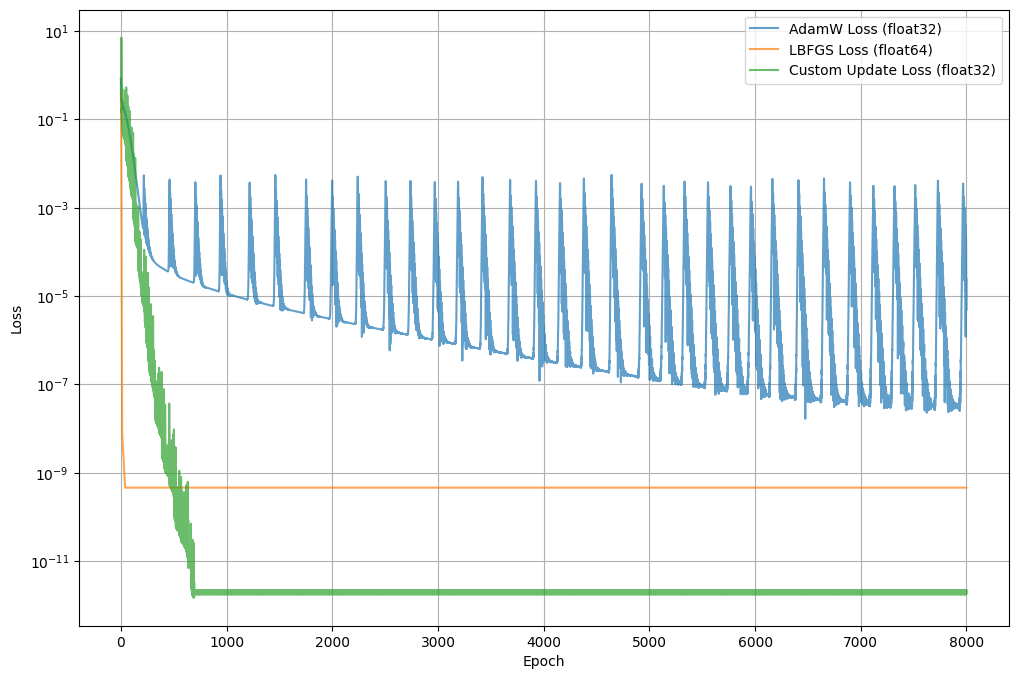

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(adamw_loss_history, label='AdamW Loss (float32)', alpha=0.7)
plt.plot(lbfgs_loss_history, label='LBFGS Loss (float64)', alpha=0.7)
plt.plot(custom_loss_history, label='Custom Update Loss (float32)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

In [34]:
analyze_convergence(adamw_loss_history)
print("***lbfgs****")
analyze_convergence(lbfgs_loss_history)
print("***direct newton**")
analyze_convergence(custom_loss_history)

Loss increased 3639 times after reaching 0.0001.
Epoch 272: 0.000097 → 0.000106
Epoch 273: 0.000106 → 0.000118
Epoch 275: 0.000095 → 0.000095
Epoch 276: 0.000095 → 0.000108
Epoch 279: 0.000087 → 0.000098
Epoch 282: 0.000083 → 0.000089
Epoch 285: 0.000080 → 0.000082
Epoch 286: 0.000082 → 0.000084
Epoch 289: 0.000077 → 0.000079
Epoch 292: 0.000074 → 0.000075
Loss at last 0.000023942095 2.394210e-05
***lbfgs****
No loss increases after convergence.
Loss at last 0.000000000455 4.551017e-10
***direct newton**
Loss increased 3846 times after reaching 0.0001.
Epoch 167: 0.000037 → 0.000095
Epoch 169: 0.000038 → 0.000119
Epoch 171: 0.000040 → 0.000043
Epoch 173: 0.000035 → 0.000051
Epoch 175: 0.000029 → 0.000286
Epoch 178: 0.000027 → 0.000036
Epoch 180: 0.000023 → 0.000116
Epoch 183: 0.000022 → 0.000137
Epoch 186: 0.000020 → 0.000193
Epoch 190: 0.000015 → 0.000017
Loss at last 0.000000000002 2.158200e-12


In [35]:
print_learned_parameters(model_adamw)
print_learned_parameters(model_lbfgs)
print_learned_parameters(model_custom)

Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.7710]])
Parameter: raw_attention.Wk.weight, Value: tensor([[0.8009]])
Parameter: raw_attention.Wv.weight, Value: tensor([[-0.8130]])
Parameter: attn_out.weight, Value: tensor([[1.9969, 1.9969]])
Parameter: attn_out.bias, Value: tensor([2.4881e-05])
0.9943683009886622 0.994372990480886 -2.0050895085869094 2.488063182681799e-05
0.9944, 0.9944, -2.0051, 0.0000
Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.4449]], dtype=torch.float64)
Parameter: raw_attention.Wk.weight, Value: tensor([[0.3003]], dtype=torch.float64)
Parameter: raw_attention.Wv.weight, Value: tensor([[-3.7426]], dtype=torch.float64)
Parameter: attn_out.weight, Value: tensor([[1.9999, 1.9999]], dtype=torch.float64)
Parameter: attn_out.bias, Value: tensor([2.6481e-05], dtype=torch.float64)
0.9999478703447624 0.9999577788244088 -1.9999175165829148 2.6481347120726256e-05
0.9999, 1.0000, -1.9999, 0.0000
Learned Parameters:
Param

In [18]:
print("--- Training with AdamW Optimizer (float64) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float64)

X_64, y_64 = get_gate_data('xor', dtype=dtype_float64)
model_adamw_64, loss_fn_adamw_64 = initialize_model_and_loss(dtype=dtype_float64)
optimizer_adamw_64 = optim.AdamW(model_adamw_64.parameters(), lr=0.05)

adamw_loss_history_64 = train_model(model_adamw_64, optimizer_adamw_64, loss_fn_adamw_64, X_64, y_64,
                                    epochs=8000, log_interval=500, optimizer_type='adamw')

--- Training with AdamW Optimizer (float64) ---
Epoch    0 | Loss: 0.41740334
Epoch  500 | Loss: 0.00000775
Epoch 1000 | Loss: 0.00436784
Epoch 1500 | Loss: 0.00030319
Epoch 2000 | Loss: 0.00000201
Epoch 2500 | Loss: 0.00000319
Epoch 3000 | Loss: 0.00000026
Epoch 3500 | Loss: 0.00000016
Epoch 4000 | Loss: 0.00000010
Epoch 4500 | Loss: 0.00000007
Epoch 5000 | Loss: 0.00000076
Epoch 5500 | Loss: 0.00001227
Epoch 6000 | Loss: 0.00000016
Epoch 6500 | Loss: 0.00000059
Epoch 7000 | Loss: 0.00000002
Epoch 7500 | Loss: 0.00000052


In [19]:
print("--- Training with LBFGS Optimizer (float64) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float64)

X_64, y_64 = get_gate_data('xor', dtype=dtype_float64)
model_lbfgs_64, loss_fn_lbfgs_64 = initialize_model_and_loss(dtype=dtype_float64)
optimizer_lbfgs_64 = torch.optim.LBFGS(model_lbfgs_64.parameters(), lr=0.05, max_iter=20, history_size=100)

lbfgs_loss_history_64 = train_model(model_lbfgs_64, optimizer_lbfgs_64, loss_fn_lbfgs_64, X_64, y_64,
                                    epochs=8000, log_interval=500, optimizer_type='lbfgs')

--- Training with LBFGS Optimizer (float64) ---
Epoch    0 | Loss: 0.41740334
Epoch  500 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3500 | Loss: 0.00000000
Epoch 4000 | Loss: 0.00000000
Epoch 4500 | Loss: 0.00000000
Epoch 5000 | Loss: 0.00000000
Epoch 5500 | Loss: 0.00000000
Epoch 6000 | Loss: 0.00000000
Epoch 6500 | Loss: 0.00000000
Epoch 7000 | Loss: 0.00000000
Epoch 7500 | Loss: 0.00000000


In [25]:
print("--- Training with Custom Optimizer (float64) ---")
torch.manual_seed(0)
torch.set_default_dtype(dtype_float64)

X_64, y_64 = get_gate_data('xor', dtype=dtype_float64)
model_custom_64, loss_fn_custom_64 = initialize_model_and_loss(dtype=dtype_float64)

custom_loss_history_64 = train_model(model_custom_64, None, loss_fn_custom_64, X_64, y_64,
                                     epochs=8000, log_interval=100, optimizer_type='custom',
                                     custom_update_fn=custom_gradient_update)

--- Training with Custom Optimizer (float64) ---
Epoch    0 | Loss: 0.41740334
Epoch  100 | Loss: 0.03145778
Epoch  200 | Loss: 0.00107527
Epoch  300 | Loss: 0.00000036
Epoch  400 | Loss: 0.00000000
Epoch  500 | Loss: 0.00000000
Epoch  600 | Loss: 0.00000000
Epoch  700 | Loss: 0.00000000
Epoch  800 | Loss: 0.00000000
Epoch  900 | Loss: 0.00000000
Epoch 1000 | Loss: 0.00000000
Epoch 1100 | Loss: 0.00000000
Epoch 1200 | Loss: 0.00000000
Epoch 1300 | Loss: 0.00000000
Epoch 1400 | Loss: 0.00000000
Epoch 1500 | Loss: 0.00000000
Epoch 1600 | Loss: 0.00000000
Epoch 1700 | Loss: 0.00000000
Epoch 1800 | Loss: 0.00000000
Epoch 1900 | Loss: 0.00000000
Epoch 2000 | Loss: 0.00000000
Epoch 2100 | Loss: 0.00000000
Epoch 2200 | Loss: 0.00000000
Epoch 2300 | Loss: 0.00000000
Epoch 2400 | Loss: 0.00000000
Epoch 2500 | Loss: 0.00000000
Epoch 2600 | Loss: 0.00000000
Epoch 2700 | Loss: 0.00000000
Epoch 2800 | Loss: 0.00000000
Epoch 2900 | Loss: 0.00000000
Epoch 3000 | Loss: 0.00000000
Epoch 3100 | Loss: 0.

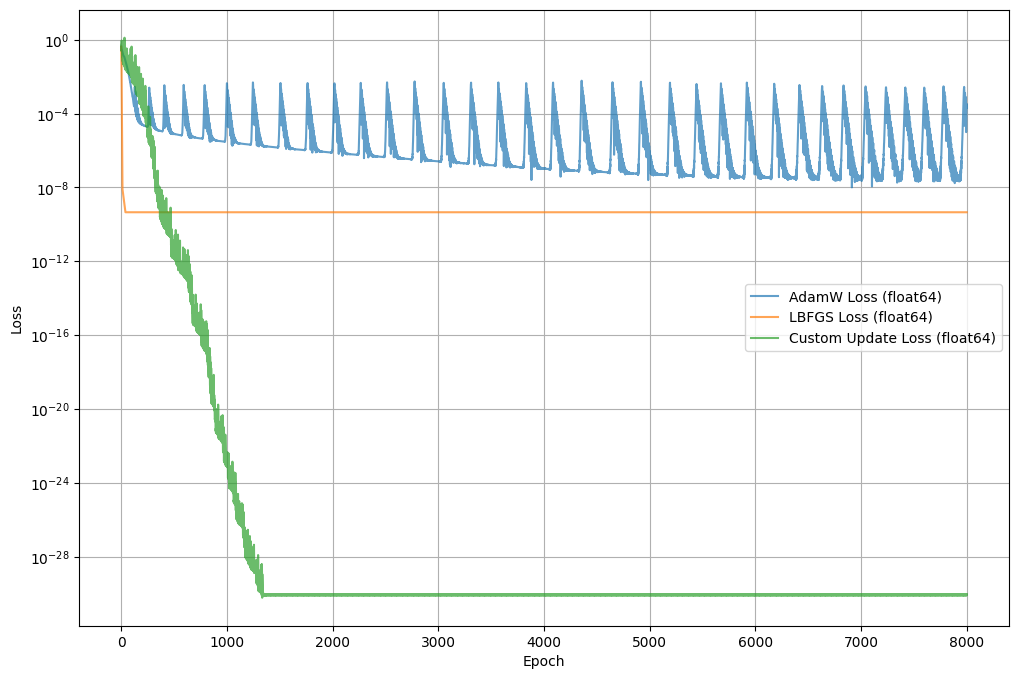

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(adamw_loss_history_64, label='AdamW Loss (float64)', alpha=0.7)
plt.plot(lbfgs_loss_history_64, label='LBFGS Loss (float64)', alpha=0.7)
plt.plot(custom_loss_history_64, label='Custom Update Loss (float64)', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

In [30]:
print("***adamw (float64)***")
analyze_convergence(adamw_loss_history_64)
print("***lbfgs (float64)****")
analyze_convergence(lbfgs_loss_history_64)
print("***direct newton (float64)**")
analyze_convergence(custom_loss_history_64)

***adamw (float64)***
Loss increased 3981 times after reaching 0.0001.
Epoch 142: 0.000070 → 0.000418
Epoch 143: 0.000418 → 0.000510
Epoch 145: 0.000100 → 0.000213
Epoch 146: 0.000213 → 0.000408
Epoch 149: 0.000101 → 0.000303
Epoch 152: 0.000051 → 0.000205
Epoch 155: 0.000045 → 0.000121
Epoch 156: 0.000121 → 0.000182
Epoch 159: 0.000062 → 0.000144
Epoch 162: 0.000037 → 0.000094
Loss at last 0.000198351716 1.983517e-04
***lbfgs (float64)****
No loss increases after convergence.
Loss at last 0.000000000455 4.551017e-10
***direct newton (float64)**
Loss increased 3710 times after reaching 0.0001.
Epoch 208: 0.000083 → 0.001634
Epoch 212: 0.000075 → 0.000741
Epoch 215: 0.000077 → 0.000195
Epoch 217: 0.000076 → 0.000212
Epoch 219: 0.000078 → 0.000150
Epoch 221: 0.000068 → 0.001281
Epoch 225: 0.000062 → 0.000416
Epoch 228: 0.000058 → 0.003150
Epoch 233: 0.000032 → 0.001703
Epoch 238: 0.000021 → 0.000180
Loss at last 0.000000000000 9.667819e-31


In [28]:
print_learned_parameters(model_adamw_64)
print_learned_parameters(model_lbfgs_64)
print_learned_parameters(model_custom_64)

Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.8130]])
Parameter: raw_attention.Wk.weight, Value: tensor([[0.7912]])
Parameter: raw_attention.Wv.weight, Value: tensor([[-0.7752]])
Parameter: attn_out.weight, Value: tensor([[1.9976, 1.9976]])
Parameter: attn_out.bias, Value: tensor([0.0033])
1.0015089631439267 1.0015365604215296 -1.9921607308629075 0.003268478393288616
1.0015, 1.0015, -1.9922, 0.0033
Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.4449]])
Parameter: raw_attention.Wk.weight, Value: tensor([[0.3003]])
Parameter: raw_attention.Wv.weight, Value: tensor([[-3.7426]])
Parameter: attn_out.weight, Value: tensor([[1.9999, 1.9999]])
Parameter: attn_out.bias, Value: tensor([2.6481e-05])
0.9999478703447624 0.9999577788244088 -1.9999175165829148 2.6481347120726256e-05
0.9999, 1.0000, -1.9999, 0.0000
Learned Parameters:
Parameter: raw_attention.Wq.weight, Value: tensor([[0.9750]])
Parameter: raw_attention.Wk.weight, Value: tensor([[